In [ ]:
"""
(6) Classificação com Gradient Boosting
Treine um modelo de Gradient Boosting no conjunto de dados Breast Cancer.
Compare o desempenho utilizando a métrica ROC-AUC e a curva ROC.
__________________________________________________________________________________________

(6) Classification with Gradient Boosting

Train a Gradient Boosting model on the Breast Cancer dataset.
Compare the performance using the ROC-AUC metric and the ROC curve.

"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score

In [ ]:
breast_cancer_data = pd.read_csv("breast-cancer.csv", encoding="utf-8")

print(breast_cancer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   espessura                 699 non-null    int64 
 1   uniformidade_tamanho      699 non-null    int64 
 2   uniformidade_forma        699 non-null    int64 
 3   aderencia_marginal        699 non-null    int64 
 4   tamanho_celula_epitelial  699 non-null    int64 
 5   nucleo_descoberto         699 non-null    object
 6   cromatina_branda          699 non-null    int64 
 7   nucleolos_normais         699 non-null    int64 
 8   mitose                    699 non-null    int64 
 9   classe                    699 non-null    object
dtypes: int64(8), object(2)
memory usage: 54.7+ KB
None


In [ ]:
breast_cancer_data.head()

,espessura,uniformidade_tamanho,uniformidade_forma,aderencia_marginal,tamanho_celula_epitelial,nucleo_descoberto,cromatina_branda,nucleolos_normais,mitose,classe
0,5,1,1,1,2,1,3,1,1,benigno
1,5,4,4,5,7,10,3,2,1,benigno
2,3,1,1,1,2,2,3,1,1,benigno
3,6,8,8,1,3,4,3,7,1,benigno
4,4,1,1,3,2,1,3,1,1,benigno


In [ ]:
# PRE-PROCESSING NOTES:
# We won't scale the data, because the Gradient Boosting algorithm isn't sensitive
# to the numerical scales of the data like KNN or Support Vector Machines

# What we have to do is convert the data 'nucleo_descoberto' and 'classe' from object to numerical

In [ ]:
# Checking for unique values
print(breast_cancer_data['nucleo_descoberto'].unique())
print(breast_cancer_data['classe'].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
['benigno' 'maligno']


In [ ]:
# Changing '?' in 'nucleo_descoberto' to NaN
breast_cancer_data['nucleo_descoberto'] = breast_cancer_data['nucleo_descoberto'].replace('?', np.nan)

# Changing the data in 'nucleo_descoberto' to numeric
breast_cancer_data['nucleo_descoberto'] = pd.to_numeric(breast_cancer_data['nucleo_descoberto'], errors='coerce')

# Optional: deleting lines with NaN values
breast_cancer_data.dropna(subset=['nucleo_descoberto'], inplace=True)

# Converting the data in 'classe' to numerical
breast_cancer_data['classe'] = breast_cancer_data['classe'].map({'benigno': 0, 'maligno': 1})

In [ ]:
print(breast_cancer_data.info())
print("\n")
breast_cancer_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   espessura                 683 non-null    int64  
 1   uniformidade_tamanho      683 non-null    int64  
 2   uniformidade_forma        683 non-null    int64  
 3   aderencia_marginal        683 non-null    int64  
 4   tamanho_celula_epitelial  683 non-null    int64  
 5   nucleo_descoberto         683 non-null    float64
 6   cromatina_branda          683 non-null    int64  
 7   nucleolos_normais         683 non-null    int64  
 8   mitose                    683 non-null    int64  
 9   classe                    683 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 58.7 KB
None




,espessura,uniformidade_tamanho,uniformidade_forma,aderencia_marginal,tamanho_celula_epitelial,nucleo_descoberto,cromatina_branda,nucleolos_normais,mitose,classe
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


In [ ]:
# Defining the columns that are studied to make the classification
x = np.array(breast_cancer_data[['espessura', 'uniformidade_tamanho', 'uniformidade_forma',
                                 'aderencia_marginal', 'tamanho_celula_epitelial', 'nucleo_descoberto',
                                 'cromatina_branda', 'nucleolos_normais', 'mitose']])
# Defining the classification column
y = np.array(breast_cancer_data[['classe']])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print("{0:0.2f}% in the training set".format((len(x_train)/len(breast_cancer_data.index)) * 100))
print("{0:0.2f}% int the validation set".format((len(x_test)/len(breast_cancer_data.index)) * 100))

74.96% in the training set
25.04% int the validation set


In [ ]:
model = GradientBoostingClassifier();
model.fit(x_train, y_train.flatten())

GradientBoostingClassifier()

In [ ]:
y_pred_val = model.predict(x_test)

In [ ]:
# Predicting
y_scores = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

In [ ]:
# MEASURING MODEL ROC-AUC SCORE
roc_auc = roc_auc_score(y_test, y_pred_val)
print(f"MODEL ROC-AUC SCORE:")
print(roc_auc)

MODEL ROC-AUC SCORE:
0.9736486486486486


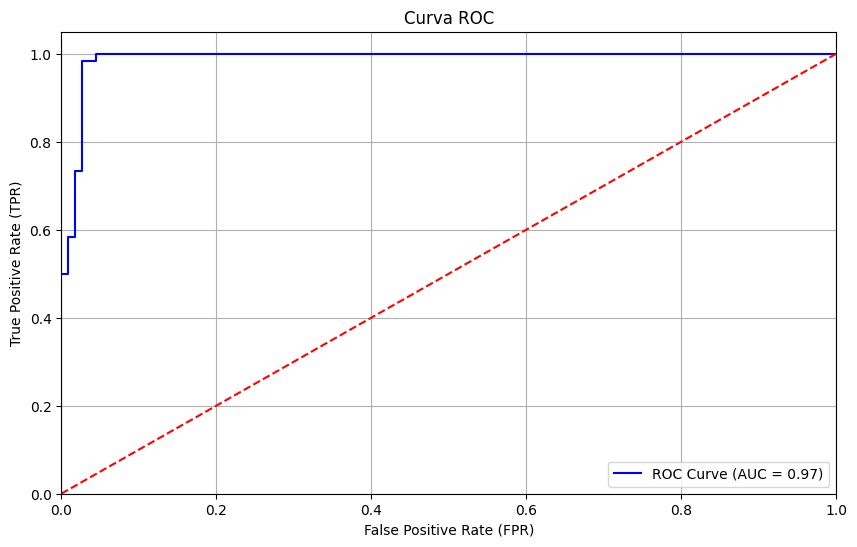

In [ ]:
# PLOTTING THE ROC CURVE
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()